In [11]:
# Import Librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataprep as dp
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import pandas_profiling


Pandas backend loaded 1.5.2
Numpy backend loaded 1.23.5
Pyspark backend loaded 3.3.1
Python backend loaded


In [2]:
df_ml = pd.read_parquet('./movies_completo_ML.parquet')

In [7]:
df_ml.shape

(9564574, 4)

In [3]:
df_ml.head(2)

,id,userId,score,title
0,ns2186,1,4.5,horse tribe
1,ns2186,231,4.0,horse tribe


In [4]:
df_ml.columns

Index(['id', 'userId', 'score', 'title'], dtype='object')

In [5]:
print(len(df_ml['userId'].unique()))

113937


In [17]:
df_ml.describe()

,userId,score
count,9.564574e+06,9.564574e+06
mean,9.001332e+04,3.533879e+00
std,8.688947e+04,1.059644e+00
min,1.000000e+00,5.000000e-01
25%,2.857600e+04,3.000000e+00
50%,5.684500e+04,3.500000e+00
75%,1.168950e+05,4.000000e+00
max,2.708960e+05,5.000000e+00


In [19]:
print("Cantidad de filas: ", df_ml.shape[0])
for column in df_ml.columns:
    print(column, df_ml[column].dtype, "Valores no nulos: ", df_ml[column].count())

Cantidad de filas:  9564574
id object Valores no nulos:  9564574
userId int64 Valores no nulos:  9564574
score float64 Valores no nulos:  9564574
title object Valores no nulos:  9564574


In [8]:
# Calificaciones de peliculas por usuario

df_ml_by_users = df_ml.groupby(['userId']).count()
df_ml_by_users.head()

,id,score,title
userId,,,
1,24,24,24
2,16,16,16
3,6,6,6
4,54,54,54
5,24,24,24


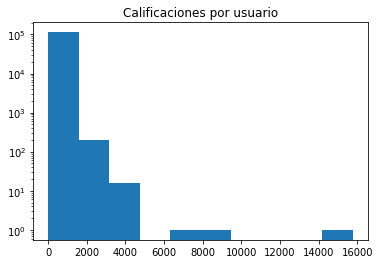

In [9]:
plt.hist(df_ml_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

In [10]:
# Pelicula con mas calificacion

df_ml_by_movies = df_ml.groupby(['title']).count()
df_ml_by_movies.head()

,id,userId,score
title,,,
"""mixed up""",467,467,467
"""the paramedic angel""",513,513,513
#alive,472,472,472
#annefrank - parallel stories,493,493,493
#blackaf,515,515,515


In [26]:
print(f"Usuarios unicos: {df_ml['userId'].nunique()}" )

Usuarios unicos: 113937


In [25]:
print(f"Peliculas unicas: {df_ml['id'].nunique()}" )

Peliculas unicas: 14367


Chequeo duplicados

In [ ]:
num_duplicados = df_ml.duplicated().sum()

# imprimir el número de valores duplicados
print("El número de valores duplicados en el dataset es:", num_duplicados)

In [15]:
report = df_ml.profile_report(sort='descending', html={'style':{'full_width':True}})

In [16]:
report.to_file(output_file="EDA_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Program Files\Python310\lib\site-packages\pandas_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]